In [3]:
from tensorflow.keras.models import load_model
import numpy as np
import os
from tensorflow.keras.preprocessing import image
model=load_model(os.path.join('models','catdogclassifier.h5'))
imsize=(128,128)
try:
    os.remove('cats.txt')
    os.remove('cars.txt')
except:
    pass
labels=['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']

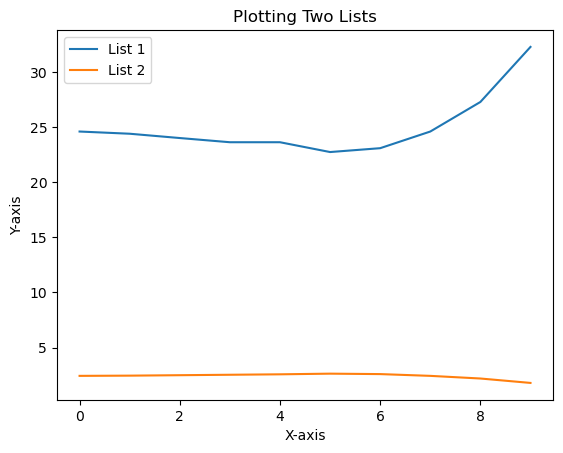

In [4]:
import matplotlib.pyplot as plt

# Example lists of values
list1 = [24.59, 24.39, 24, 23.62, 23.62, 22.73,23.08,24.59,27.27,32.26]
list2 = [2.44, 2.46, 2.5, 2.54, 2.58,2.64,2.6,2.44,2.2,1.8]

# Plotting
plt.plot(list1,list2, label='List 1')
#plt.plot(, label='List 2')

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plotting Two Lists')
plt.legend()  # Add legend to distinguish between List 1 and List 2

# Display the plot
plt.show()

In [4]:
predicted_label=[]
true_label=[]
for i in os.listdir('datasetbkup/test'):
    for j in os.listdir(os.path.join('datasetbkup/test',i)):
        filename=os.path.join('datasetbkup/test/',i,j)
        img=image.load_img(filename, target_size=imsize)
        resized_img=image.img_to_array(img)
        final=np.expand_dims(resized_img,axis=0)
        predictions=model.predict(final)
        true_label.append(os.listdir('datasetbkup/test').index(i))
        predicted_label.append(list(predictions[0]).index(max(predictions[0])))


2024-01-25 21:36:44.473290: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-25 21:36:44.563233: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 0s 14ms/step


2024-01-25 21:36:45.144550: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 0s 13ms/step


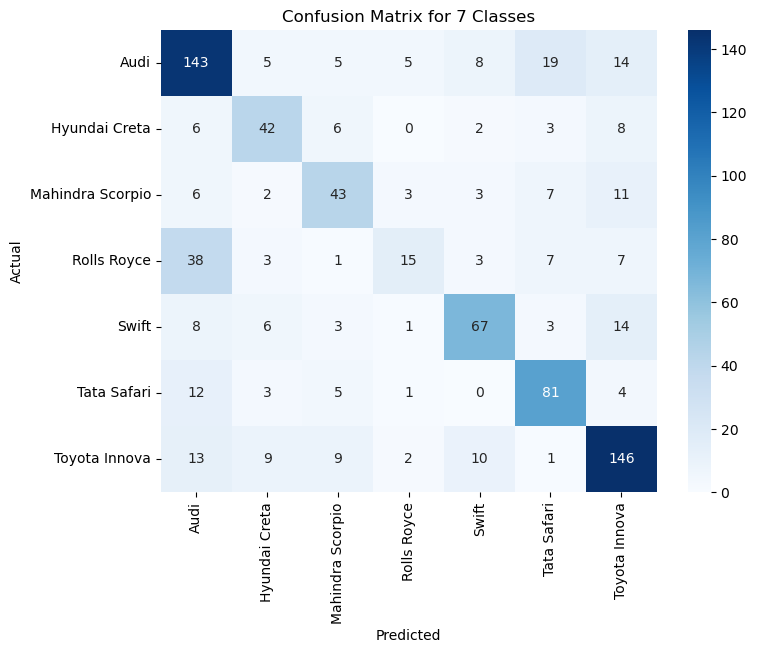

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(true_label, predicted_label)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels,
            yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for 7 Classes')
plt.show()

In [6]:
acc2=0
predicted_label=[]
true_label=[]
for i in os.listdir('datasetbkup/test/cars'):
    filename=os.path.join('datasetbkup/test/cars',i)
    img=image.load_img(filename, target_size=imsize)
    resized_img=image.img_to_array(img)
    final=np.expand_dims(resized_img,axis=0)
    predictions=model.predict(final)
    print(predictions)
    animaltype='car' if predictions[0][0] > predictions[0][1] else 'cat'
    acc2+=1 if animaltype=='car' else 0
    predicted_label.append(0 if animaltype=='car' else 1)
    true_label.append(0)
    with open('cars.txt','a') as f:
        f.writelines(str(i)+'    '+str(predictions)+'     '+str(animaltype)+'\n')
acc2/=len(os.listdir('datasetbkup/test/cars'))

print(acc2)


FileNotFoundError: [Errno 2] No such file or directory: 'datasetbkup/test/cars'

In [ ]:
acc1=0
for i in os.listdir('datasetbkup/test/cats'):
    filename=os.path.join('datasetbkup/test/cats',i)
    img=image.load_img(filename, target_size=imsize)
    resized_img=image.img_to_array(img)
    final=np.expand_dims(resized_img,axis=0)
    predictions=model.predict(final)
    print(predictions)
    animaltype='cat' if predictions[0][1] > predictions[0][0] else 'car'
    acc1+=1 if animaltype == 'cat' else 0
    predicted_label.append(1 if animaltype == 'cat' else 0)
    true_label.append(1)
    with open('cats.txt','a') as f:
        f.writelines(str(i)+'    '+str(predictions)+'     '+str(animaltype)+'\n')
acc1/=len(os.listdir('datasetbkup/test/cats'))
print(acc1)

In [ ]:
print(true_label)
print(predicted_label)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(true_label, predicted_label)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Car", "Predicted Cat"],
            yticklabels=["Actual Car", "Actual Cat"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Binary Classification)")
plt.show()